In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train=pd.read_csv("fashion-mnist_train.csv")
df_test=pd.read_csv("fashion-mnist_test.csv")

In [3]:
X_train=df_train.drop('label', axis=1)
y_train=df_train['label']

In [4]:
X_test=df_test.drop('label', axis=1)
y_test=df_test['label']

In [5]:
X_train, X_test, y_train, y_test= np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [6]:
X_train_shaped=X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test_shaped=X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_cat=to_categorical(y_train, 10)
y_test_cat=to_categorical(y_test, 10)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy

model=Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10)
])

In [9]:
model.compile(optimizer='adam', loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(X_train_shaped, y_train_cat, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 0.6041 - accuracy: 0.7936
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4303 - accuracy: 0.8486
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3904 - accuracy: 0.8620
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3681 - accuracy: 0.8692
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3528 - accuracy: 0.8739
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3363 - accuracy: 0.8797
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3224 - accuracy: 0.8843
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3148 - accuracy: 0.8855
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3051 - accuracy: 0.8903
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2973 - accuracy: 0.8928

In [10]:
loss, acc=model.evaluate(X_test_shaped, y_test_cat)
loss, acc

313/313 [==============================] - 1s 4ms/step - loss: 0.3493 - accuracy: 0.8751


(0.3493248224258423, 0.8751000165939331)

In [12]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test_shaped)

y_pred_labels=np.argmax(y_pred, axis=1)
y_test_labels=np.argmax(y_test_cat, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.75      0.87      0.80      1000
           3       0.90      0.90      0.90      1000
           4       0.75      0.87      0.81      1000
           5       0.97      0.93      0.95      1000
           6       0.87      0.43      0.58      1000
           7       0.90      0.95      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



1/1 [==============================] - 0s 52ms/step
sandal


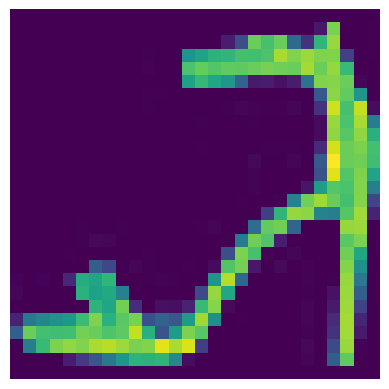

In [17]:
import matplotlib.pyplot as plt
def predict(id):
    labels=['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
    pred=model.predict(X_test_shaped[id:id+1])
    pred_lab=labels[np.argmax(pred)]
    print(pred_lab)
    plt.imshow(X_test_shaped[id])
    plt.axis("off")
    
predict(8)